# DV Laboratory Part B - Exercise 3

### In a retail experiment, we want to understand how advertising expenditure, store location, and competition affect sales revenue. Using synthetic data, implement multiple linear regression in Python to analyze these factors. Interpret the coefficients, perform an F-test to assess overall model significance, and conduct t-tests to evaluate the significance of individual coefficients.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("sales.csv")

In [3]:
x1 = df["AdvertisingExpenditure"]
x2 = df["Competition"]
x3 = df["StoreLocation"]
x = pd.concat([x1, x2, x3], axis=1)
y = df["SalesRevenue"]

In [4]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [5]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [2.11493691e+00 2.27274333e+03 2.19396228e+03]
Intercept: 3176.7913667305384


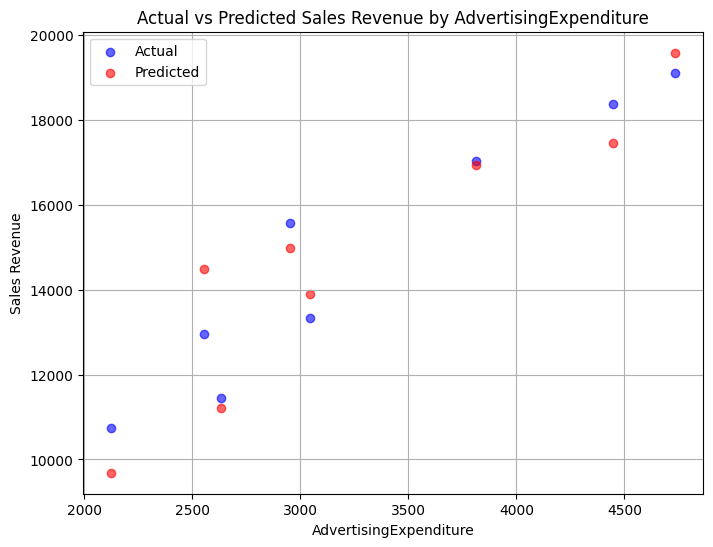

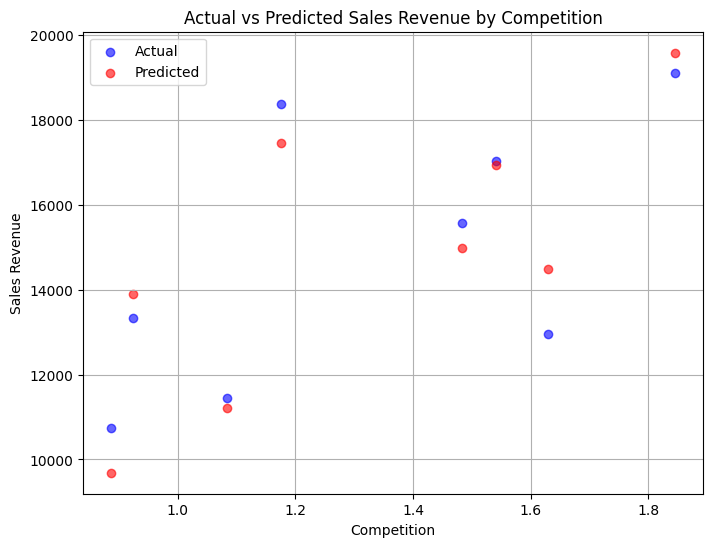

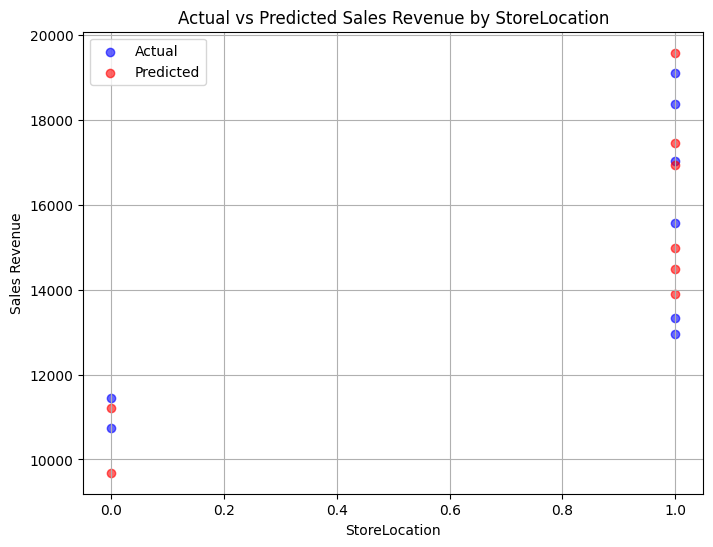

In [6]:
predictors = ["AdvertisingExpenditure", "Competition", "StoreLocation"]
for predictor in predictors:
    plt.figure(figsize=(8, 6))
    plt.scatter(x_test[predictor], y_test, color='blue', label='Actual', alpha=0.6)
    plt.scatter(x_test[predictor], y_pred, color='red', label='Predicted', alpha=0.6)
    plt.xlabel(predictor)
    plt.ylabel('Sales Revenue')
    plt.title(f'Actual vs Predicted Sales Revenue by {predictor}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
import statsmodels.api as sm
import pandas as pd

X = df[['AdvertisingExpenditure', 'Competition', 'StoreLocation']]
Y = df['SalesRevenue']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

f_stat = model.fvalue

t_stat_advertising = model.tvalues['AdvertisingExpenditure']
t_stat_competition = model.tvalues['Competition']
t_stat_location = model.tvalues['StoreLocation']

print(f"F-statistic: {f_stat:.2f}")
print(f"t-statistic for AdvertisingExpenditure: {t_stat_advertising:.2f}")
print(f"t-statistic for Competition: {t_stat_competition:.2f}")
print(f"t-statistic for StoreLocation: {t_stat_location:.2f}")

ModuleNotFoundError: No module named 'statsmodels'